# Test example Charbeneau (2003) Fig 4.4.3

This is probably the easiest way to compare the class with US soils with that of Dutch soils: recreating figg 4.4.3 in the book of of Charbeneau (2000, p198)

VGM = Van Genughten and Mualem (1980)   Import the class Soil from it.
HBW = Heinen, Bakker and Wösten (2020)  Import the class Soil form it.
BC = Brooks and Corey (1966) relations.

NL_soils.py is a module handling Dutch soils VGM relations.
US_soils.py is a module handling US soils using BC relations.


* Charbeneau, R.J. (2000) Groundwater Hydraulic and Pollutant Transport. ISBN 0-13-975616-7
* Brooks R.H and Corey A.T. (1966) Properties of porous media affecting fluid flow. Journal of Irrigation and 
Drainage Div. ASCE, IR2, 61-88.
* Heinen M., Bakker G. and Wösten J.H.M. (2020) Waterretentie- en doorlatendheidskarateristieken van boven- en ondergronden in Nederland: De Staringreeks. Update 2018. Wageningen, Wageningen  Environmental Research, Rapport 2978. 78 blz.; 6 fig. 4 tab. 22 ref.

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle
from importlib import reload
import etc

# Make sure the project director is the the directory yielded by os.getcwd()
# This is 
pjd = os.getcwd()
if not pjd in sys.path:     # noqa
    sys.path.insert(0, os.getcwd())

from src.soil_base import SoilBase  # noqa

# Then we can load from .src and .notebook, .docs, .images etc (without the point)
from src.NL_soils import Soil as sNL  # Module with class Soil handling Dutch soils using HBW or VGM relations.
from src.US_soils import Soil as sUS  # Module with class Soil handling US soils using BC relatons.

# Verify the working project directory
print(os.getcwd())

/Users/Theo/GRWMODELS/python/tools/Stromingen/Munsflow_H2O_1995


In [2]:
# Check the working directory the project is working from (using expected name)
root = os.getcwd()
expected = "Munsflow_H2O_1995"
if not root.endswith(expected):
    raise RuntimeError(f"Unexpected project root: {root}")
dirs = etc.Dirs(root)

In [3]:
# Get the data of the parameters of the Dutch Soils form Excel workbook and instantiate class

wbook_NL = os.path.join(dirs.data, 'NL_VG_soilprops.xlsx')

sNL.load_soils(wbook_NL) # load entire database once
sNL.pretty_data()        # show it

     Hoofdsoort                                     Omschrijving  theta_r  theta_s   alpha      n  lambda      Ks                 Leem   Lutum      os       M50   N1  N2
code                                                                                                                                                                     
B01        Zand           leemarm, zeer fijn tot matig fijn zand     0.02    0.427  0.0217  1.735   0.981   31.23                 0-10     NaN    0-15   105-210   32   7
B02        Zand        zwak lemig, zeer fijn tot matig fijn zand     0.02    0.434  0.0216  1.349   7.202   83.24                10-18     NaN    0-15   105-210   27  11
B03        Zand       sterk lemig, zeer fijn tot matig fijn zand     0.02    0.443  0.0150  1.505   0.139   19.08                18-33     NaN    0-15   105-210   14   4
B04        Zand  zeer sterk lemig, zeer fijn tot matig fijn zand     0.02    0.462  0.0149  1.397   0.295   34.88                33-50     NaN    0-15

In [4]:
# Get the parameters of the US soils form Excel workbook and instantiate class

# The workbook holding the US soils BC parameters
wbook_US = os.path.join(dirs.data, 'US_BC_soilprops.xlsx')

sUS.load_soils(wbook_US) # load once
sUS.pretty_data()        # show the data

     Main cat     Soil Texture      Ks  sigma_Ks  theta_s  sigma_theta_s  theta_r  sigma_theta_r  psi_b  sigma_psi_b  lambda  sigma_lambda
code                                                                                                                                      
US01     Clay             Clay    4.80      10.0     0.38           0.09    0.068          0.034  125.0        188.0    0.09          0.09
US02     Loam        Clay loam    6.20      17.0     0.41           0.09    0.095          0.010   53.0         42.0    0.31          0.09
US03     Loam             Loam   25.00      44.0     0.43           0.10    0.078          0.013   28.0         16.0    0.56          0.11
US04     Sand       Loamy sand  350.00     270.0     0.41           0.09    0.057          0.015    8.1          2.8    1.28          0.27
US05     Silt             Silt    6.00       7.9     0.46           0.11    0.034          0.010   62.0         27.0    0.37          0.05
US06     Loam       Silty l

# Now instantiate a Duch and a US soil object to compare

It doesn't matter which line from the database to use, because we'll alter their paramters to match those used by Charbenau to create his figure.

Notice that coductivity of the Dutch soils are described HBW (2020) by a extra 6th parameter named $\lambda$. This parameter is lacking in the VGM relations, which does have an "el" l, which is, however generally set to 0.5 as is done in the current module as well if VGM is applied.

The extra parameter only affects the compuation of the hydraulic conductivity in HBW (2020) and not used by Charbeneau (2000). Therefore, for our comparison with Charbeau's figure 4.4.1 we don't use the lambda.

In [5]:

sand_vg = sNL("O01", HBW=False) # Use VGM formulas
sand_bc = sUS("US01")

# Charbeneau used
alpha, m = 0.0202, 0.87   # VGM
lambda_, psi_b = 3.7, 41. # BC

n = 1 / (1 - m) # VGM

sand_vg.props['alpha'], sand_vg.props['m'], sand_vg.props['n'] = alpha, m, n
sand_bc.props['lambda'],  sand_bc.props['psi_b'] = lambda_, psi_b

sand_vg.props['eqs'] = 'Van Genughten'
sand_bc.props['eqs'] = 'Brooks & Corey'

# We now set code to any string we want
sand_vg.code = 'Ch(2000) fig 4.4.1'
sand_bc.code = 'Ch(2000) fig 4.4.1'

lbl_vg = fr" [$\alpha$ = {sand_vg.props['alpha']}, $m$ = {sand_vg.props['m']}]"
lbl_bc = fr" [$\lambda$ = {sand_bc.props['lambda']}, $\psi_b$ = {sand_bc.props['psi_b']}]"

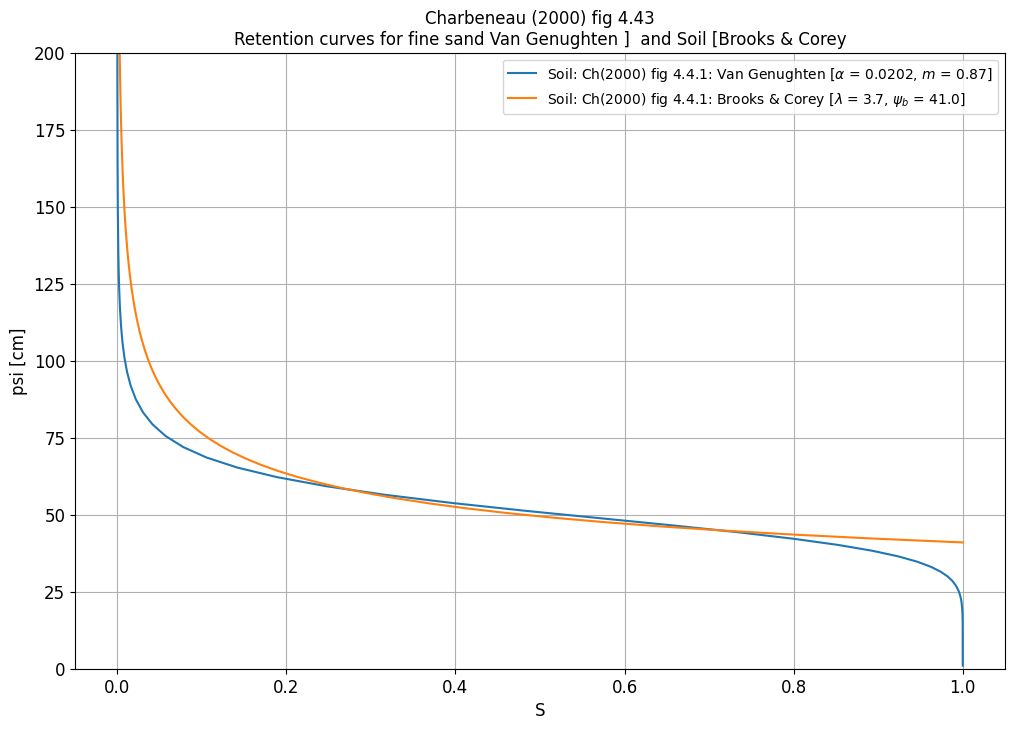

In [6]:
# Charbeneau (2000) fig 4.4.1, showing BC and vG for fine sand data.

N = 200

# Choose a proper psi range for each of the two soil
psi_vg = sand_vg.psispace(N)
psi_bc = sand_bc.psispace(N)

ttl = "Charbeneau (2000) fig 4.43\n"
title = ttl + f"Retention curves for fine sand {sand_vg.props['eqs']} ]  and Soil [{sand_bc.props['eqs']}"
ax = etc.newfig(title, 'S', 'psi [cm]', ylim=(0, 200))

ax.plot(sand_vg.S_fr_psi(psi_vg), psi_vg, label=f"Soil: {sand_vg.code}: {sand_vg.props['eqs']}" + lbl_vg)
ax.plot(sand_bc.S_fr_psi(psi_bc), psi_bc, label=f"Soil: {sand_bc.code}: {sand_bc.props['eqs']}" + lbl_bc)

sand_vg.theta_fc()
sand_bc.theta_fc()

sand_vg.theta_wp()
sand_bc.theta_wp()

ax.legend()

# TODO 2025-08-28,

### Check the saturation, whic is not zero but around 20% in fig 4.4.1

# Show some other soils:

Dutch soils
* B05: Grof zand
* B02: Loamy sand
* B13: Sandy loam

US soils
* US09 Sand
* US04 Loamy sand
* US12 Sandy loam

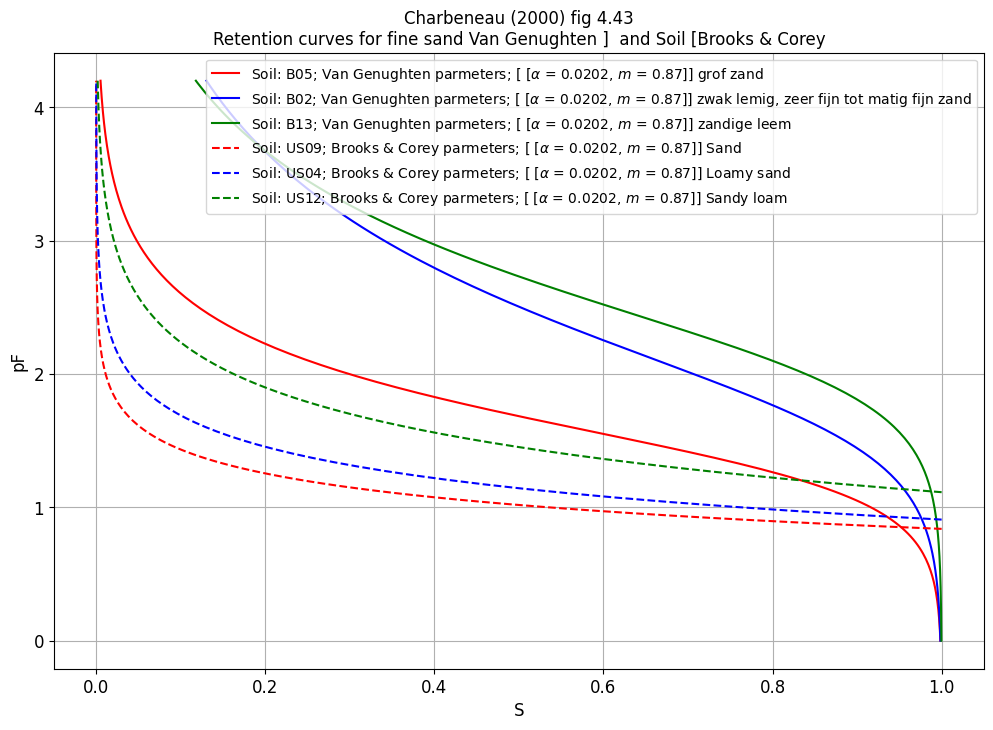

In [11]:
N = 200

ttl = "Comparison of retention curves of NL and US soil"
ax = etc.newfig(title, 'S', 'pF')

clrs = cycle('rbgkmc')
for code in ['B05', 'B02', 'B13']:
    clr = next(clrs)
    soil = sNL(code, HBW='False')

    eqs = 'Van Genughten'
    pars = fr" [$\alpha$ = {sand_vg.props['alpha']}, $m$ = {sand_vg.props['m']}]"

    psi = soil.psispace(N)
    pF = np.log10(psi)
    
    ax.plot(soil.S_fr_psi(psi), pF, '-', color=clr, label=f"Soil: {soil.code}; {eqs} parmeters; [{pars}] {soil.props['Omschrijving']}")

clrs = cycle('rbgkmc')
for code in ['US09', 'US04', "US12"]:
    clr = next(clrs)
    soil = sUS(code)
    
    eqs = 'Brooks & Corey'
    lbl_bc = fr" [$\lambda$ = {sand_bc.props['lambda']}, $\psi_b$ = {sand_bc.props['psi_b']}]"
    
    psi = soil.psispace(N)
    pF = np.log10(psi)
    
    ax.plot(soil.S_fr_psi(psi), pF, '--', color=clr, label=f"Soil: {soil.code}; {eqs} parmeters; [{pars}] {soil.props['Soil Texture']}")
    
ax.legend(loc="upper right")